## FIDE standard rating distribution (Aug 2022)

XML from: http://ratings.fide.com/download/standard_rating_list.zip


In [304]:
# Read the XML data from the file into a Pandas Dataframe

import pandas as pd
import xml.etree.ElementTree as et

xml = open("standard_rating_list.xml", "r")

df = pd.read_xml(xml)
df = df.sort_values(by=['birthday'])

print(df)

          fideid                      name country sex title w_title o_title  \
81193     202983            Demoulin, Paul     BEL   M  None    None    None   
239718    340219          Muzik, Ferdinand     CZE   M  None    None    None   
384092   2801752      Yaroslavsky, Michael     ISR   M  None    None    None   
87790    2004739            Donnelly, Ruth     USA   F  None    None    None   
67978   24515850     Codina Espinasa, Joan     ESP   M  None    None    None   
...          ...                       ...     ...  ..   ...     ...     ...   
393073    110345           Zuriel, Silvana     ARG   M  None    None    None   
393075   5102723  Zurita Castaneda, Carlos     MEX   M  None    None    None   
393097   2600889           Zurowski, Henry     CAN   M  None    None    None   
393214  13701517                   Zvyagin     KAZ   M  None    None    None   
393360  13505424             Zylkov, Denis     BLR   M  None    None    None   

       foa_title  rating  games   k  bi

In [305]:
# add decade born column

def categorize(row):
    if row.birthday < 1980:
        return "<1980"
    elif row.birthday >= 1980 and row.birthday < 1990:
        return "1980's"
    elif row.birthday >= 1990 and row.birthday < 2000:
        return "1990's"
    elif row.birthday >= 2000 and row.birthday < 2010:
        return "2000's"
    elif row.birthday >= 2010:
        return ">=2010"

df['birth_decade'] = df.apply(lambda row: categorize(row), axis=1)


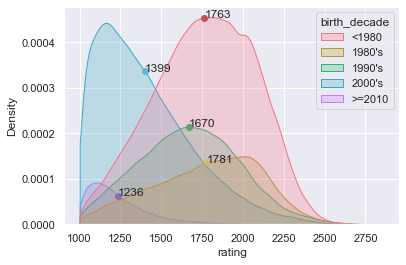

In [306]:
# make the graph

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')
sns.set_palette("hls", 1)

df = df[df["birth_decade"] != None]
decades = df["birth_decade"].unique()

p = sns.kdeplot(df["rating"], hue=df["birth_decade"], shade=False, cut=0)
lines = p.get_lines()
plt.clf()

sns.kdeplot(df["rating"], hue=df["birth_decade"], shade=True, cut=0)

means = []
for decade in decades:
    means.append(df[df["birth_decade"] == decade]["rating"].mean())

colors = ['r', 'y', 'g', 'c', 'm']

index = len(lines)
for line in lines:
    x,y = line.get_data()

    index = index - 1
    x_mean = means[index]
    y_mean = np.interp(x_mean, x, y)

    color = colors[index]

    plt.plot(x_mean, y_mean, marker='o', color=color)
    plt.annotate(int(x_mean), (x_mean, y_mean))

Text(1636.5409974834133, 0.000949486992866854, '1636')

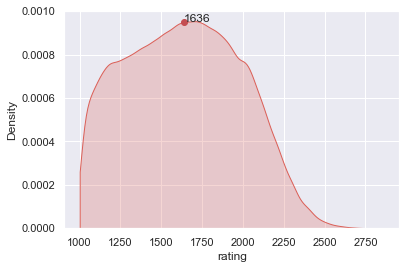

In [308]:
# overall ratings graph

p = sns.kdeplot(df["rating"], shade=False, cut=0)
line = p.get_lines()[0]
plt.clf()

sns.kdeplot(df["rating"], shade=True, cut=0)

x,y = line.get_data()

x_mean = df["rating"].mean()
y_mean = np.interp(x_mean, x, y)

color = 'r'

plt.plot(x_mean, y_mean, marker='o', color=color)
plt.annotate(int(x_mean), (x_mean, y_mean))
